
# Car Price Analysis & Prediction 🚗💰

## **Objective:**  
This project analyzes a dataset of car prices to understand key factors influencing price variations.  
We'll perform **data cleaning, exploratory data analysis (EDA), and predictive modeling** to gain insights.

## **Steps Covered:**  
1️⃣ **Data Exploration** – Understanding the dataset structure.  
2️⃣ **Data Cleaning & Preprocessing** – Handling missing values, duplicates, and encoding categorical data.  
3️⃣ **Exploratory Data Analysis (EDA)** – Visualizing relationships between price and other features.  
4️⃣ **Machine Learning Model** – Predicting car prices using Linear Regression.  
5️⃣ **Conclusion & Insights** – Summarizing key findings.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('car_price_dataset.csv')

In [3]:
df.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.20,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.00,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.20,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.00,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.60,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.70,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.40,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.70,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.60,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.10,Petrol,Manual,107724,2,5,6545


In [4]:
#df = df.sort_values(by="Year", ascending=True)\
   # .reset_index(drop=True)

In [5]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2011.54,3.00,149239.11,3.50,2.99,8852.96
std,6.90,1.15,86322.35,1.11,1.42,3112.60
min,2000.00,1.00,25.00,2.00,1.00,2000.00
25%,2006.00,2.00,74649.25,3.00,2.00,6646.00
50%,2012.00,3.00,149587.00,3.00,3.00,8858.50
75%,2017.00,4.00,223577.50,4.00,4.00,11086.50
max,2023.00,5.00,299947.00,5.00,5.00,18301.00


In [6]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [7]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.20,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.00,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.20,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.00,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.60,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.70,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.40,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.00,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.40,Hybrid,Automatic,225772,4,1,4084


In [10]:
df['Brand'].nunique()

10

In [11]:
df['Fuel_Type'].value_counts()

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

In [12]:
# Inspecting the electric cars
electric_cars = df[df['Fuel_Type'] == 'Electric']
# electric_cars = electric_cars.sort_values(by = 'Year', ascending = True)
electric_cars


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
3,Audi,Q5,2023,2.00,Electric,Manual,160971,2,1,11780
6,Honda,Civic,2010,3.40,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.70,Electric,Semi-Automatic,157495,2,2,7950
16,Hyundai,Elantra,2017,2.90,Electric,Automatic,38133,5,2,14837
17,Volkswagen,Tiguan,2006,4.50,Electric,Manual,41161,2,2,11576
...,...,...,...,...,...,...,...,...,...,...
9964,Hyundai,Tucson,2002,3.10,Electric,Automatic,62377,2,5,10052
9965,Toyota,Camry,2017,5.00,Electric,Manual,150119,4,1,13197
9969,Chevrolet,Equinox,2016,3.90,Electric,Automatic,99870,5,5,14302
9990,Audi,A3,2019,1.80,Electric,Manual,85496,4,3,11890


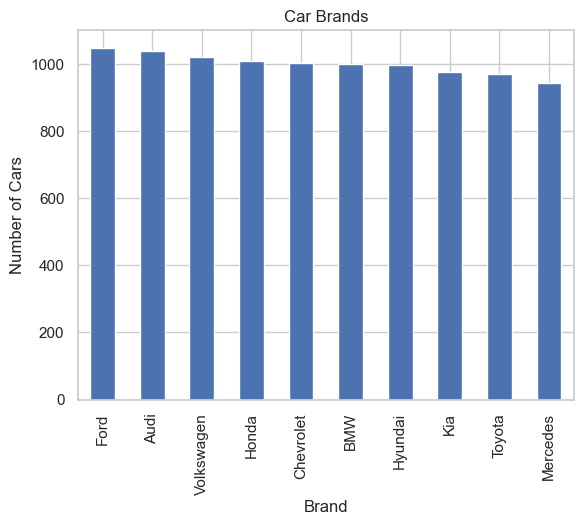

In [13]:
ax = df['Brand'].value_counts()\
    .plot(kind = 'bar', title = 'Car Brands')

ax.set_xlabel('Brand')
ax.set_ylabel('Number of Cars')
plt.show()

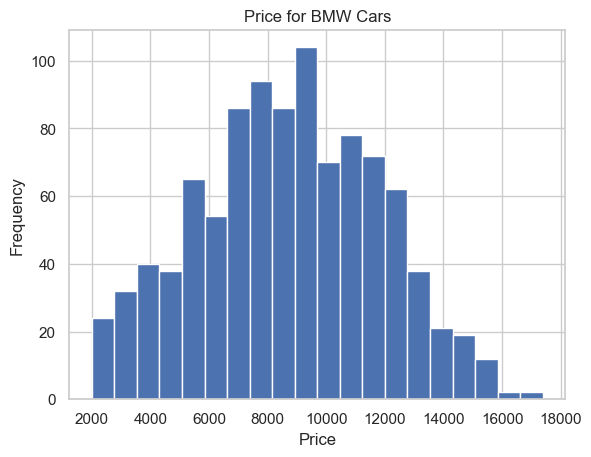

In [14]:
# histogram for price of bmw cars
bmw_cars = df[df['Brand'] == 'BMW']
ax = bmw_cars['Price'].plot(kind = 'hist', 
                         bins = 20,
                         title = 'Price for BMW Cars')
ax.set_xlabel('Price')
plt.show()

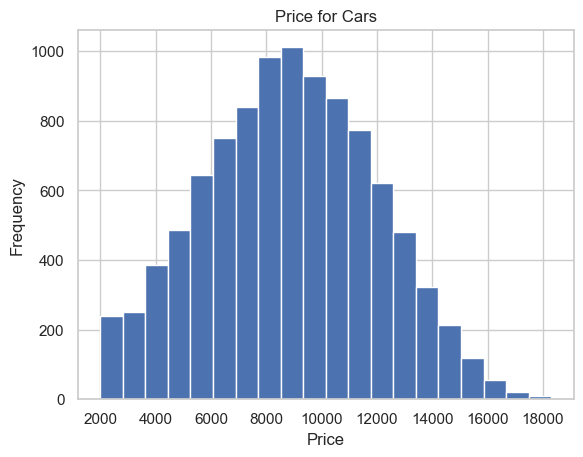

In [15]:
ax = df['Price'].plot(kind = 'hist', 
                         bins = 20,
                         title = 'Price for Cars')
ax.set_xlabel('Price')
plt.show()

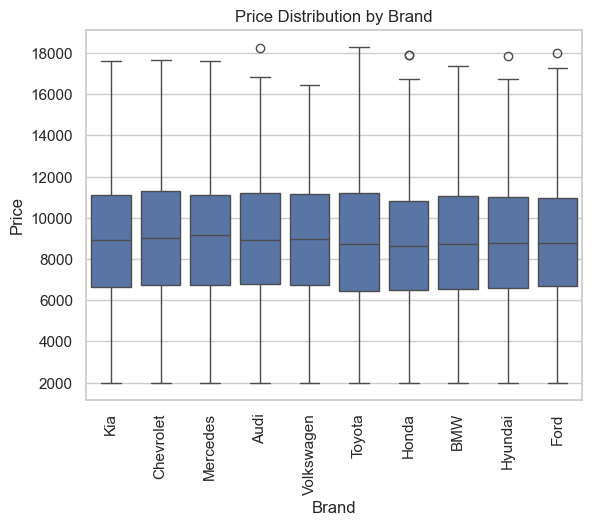

In [16]:
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.show()

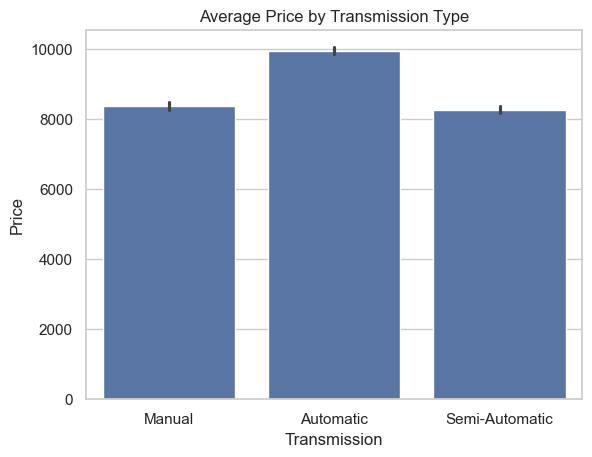

In [17]:
sns.barplot(x='Transmission', y='Price', data=df, estimator='mean')
plt.title('Average Price by Transmission Type')
plt.show()

In [18]:
df_corr = df.corr(numeric_only = True)

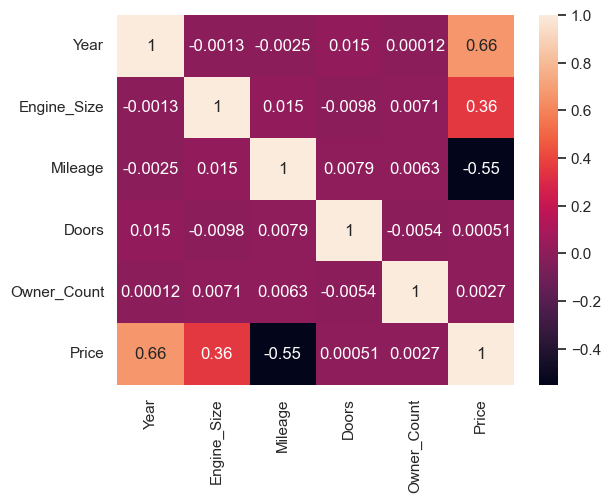

In [19]:
sns.heatmap(df_corr, annot = True)
plt.show()

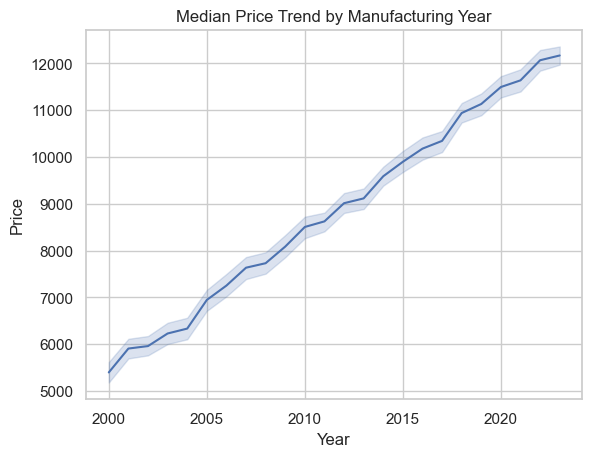

In [20]:

sns.lineplot(x='Year', y='Price', data=df, estimator='mean')
plt.title('Median Price Trend by Manufacturing Year')
plt.show()

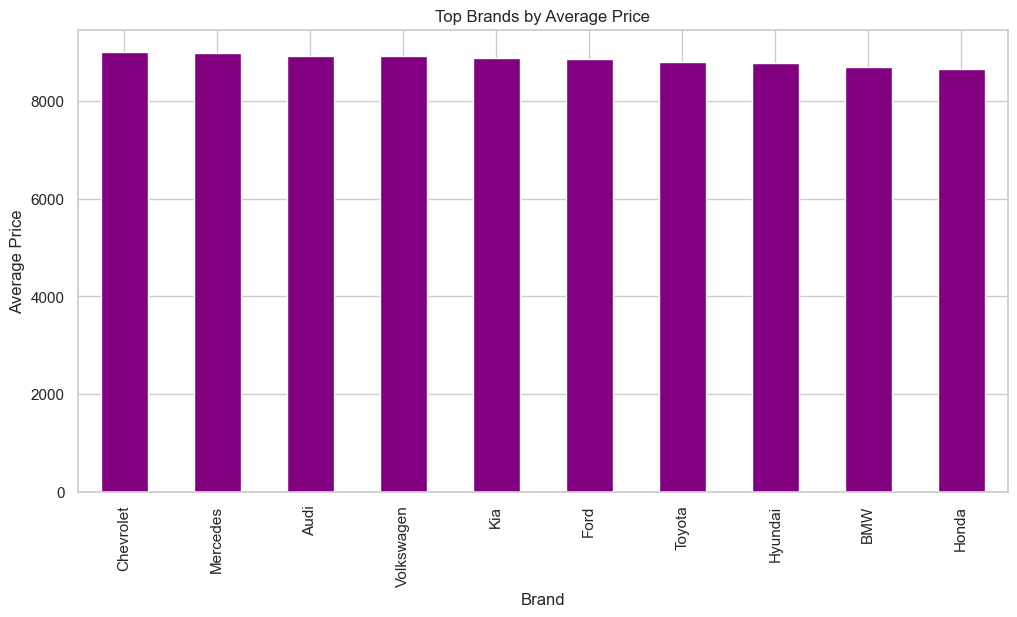

In [21]:
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
brand_price.plot(kind='bar', color='purple')
plt.title('Top Brands by Average Price')
plt.ylabel('Average Price')
plt.show()

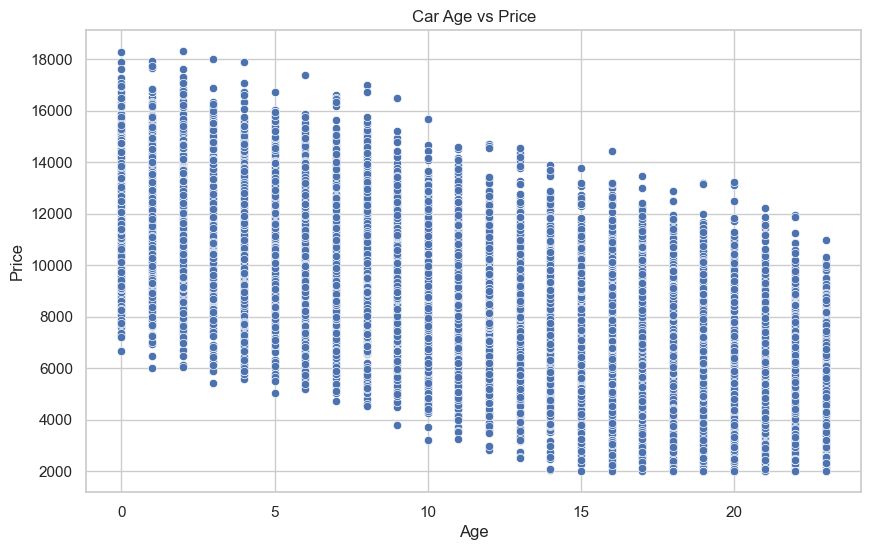

In [22]:
df['Age'] = 2023 - df['Year'] 

# Age vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('Car Age vs Price')
plt.show()

In [23]:

# 📌 **Step 2: Data Cleaning & Preprocessing**

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Encode categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Display dataset after preprocessing
df.head()


Missing Values:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
Age             0
dtype: int64


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Age,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Model_5 Series,Model_A3,Model_A4,Model_Accord,Model_C-Class,Model_CR-V,Model_Camry,Model_Civic,Model_Corolla,Model_E-Class,Model_Elantra,Model_Equinox,Model_Explorer,Model_Fiesta,Model_Focus,Model_GLA,Model_Golf,Model_Impala,Model_Malibu,Model_Optima,Model_Passat,Model_Q5,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.20,289944,3,5,8501,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,2012,2.00,5356,2,3,12092,11,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2020,4.20,231440,4,2,11171,3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2023,2.00,160971,2,1,11780,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
4,2003,2.60,286618,3,3,2867,20,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


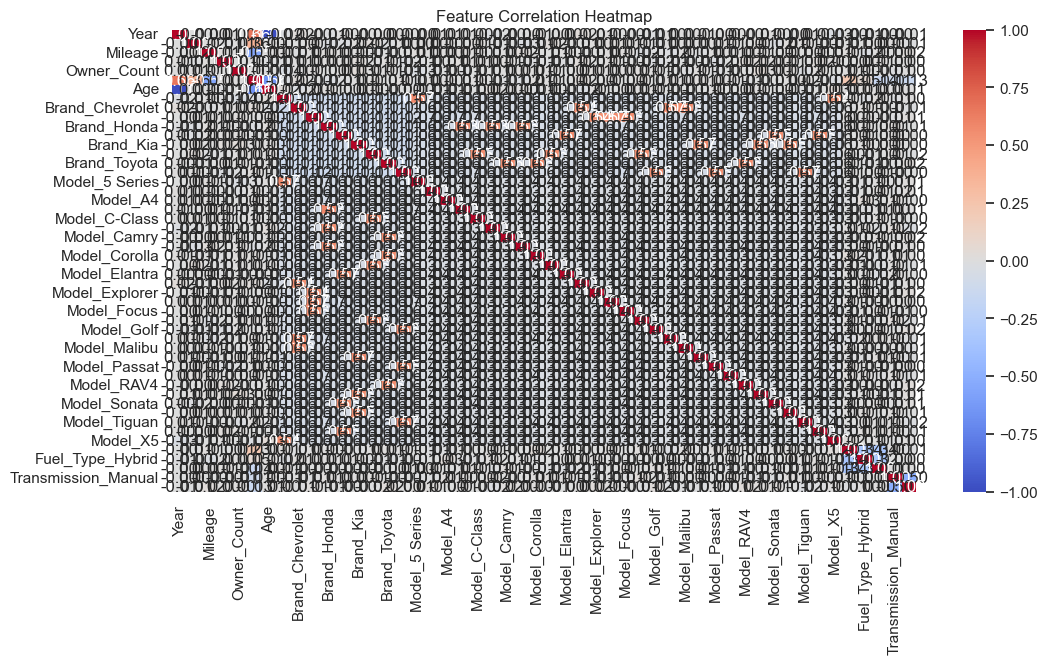

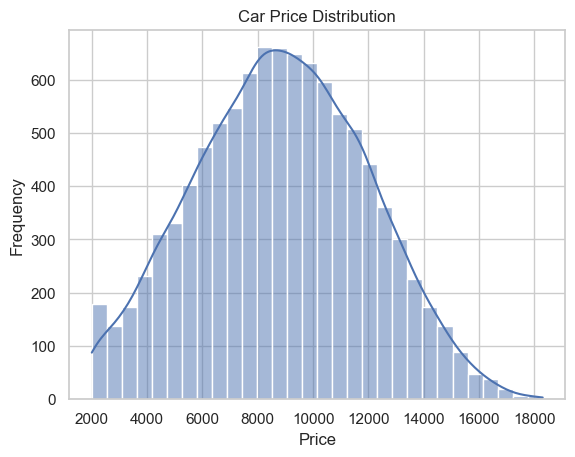

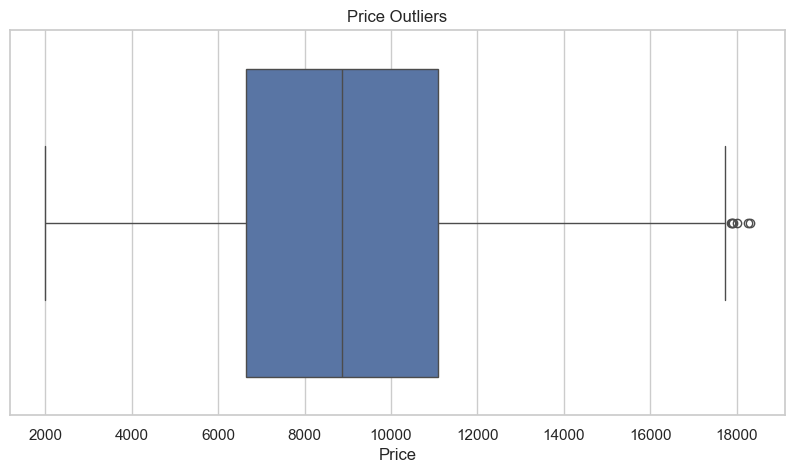

In [24]:

# 📊 **Step 3: Exploratory Data Analysis (EDA)**

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Price Distribution
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price'])
plt.title("Price Outliers")
plt.show()


In [26]:

# 🤖 **Step 4: Predicting Car Prices with Linear Regression**

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target and features
X = df.drop(columns=['Price'])
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Mean Absolute Error: 20.00
Mean Squared Error: 4213.92
R² Score: 1.00
